### Testing for the Top Down 2D Plotting of the Data

In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3

In [2]:
# Load data from the MODI SQLite database table location_data in assets

conn = sqlite3.connect("../assets/MODI.db")
cur = conn.cursor()

cur.execute("SELECT * FROM location_data WHERE est_position_x IS NOT NULL AND est_position_y IS NOT NULL AND est_position_z IS NOT NULL")
data = cur.fetchall()

conn.close()

df = pd.DataFrame(data, columns=['id', 'timestamp', 'anchor_id', 'distance', 'distance_qf', 'est_position_x', 'est_position_y', 'est_position_z', 'est_position_qf'])

In [3]:
anchor_positions = {
    '5C19': np.array([0.0, 0.0, 0.0]),
    'DC0F': np.array([0.0, -2.7, 0.0]), # -2.7m on y-axis, due to human error
    '96BB': np.array([2.2, 0.0, 0.0]),
}

In [4]:
positions = []
timestamps = []

# Get est_positions from dataframe ()
for index, row in df.iterrows():
    
    # Convert from mm to meters
    row['est_position_x'] /= 1000.0
    row['est_position_y'] /= 1000.0
    row['est_position_z'] /= 1000.0

    # Important: Invert y-axis for correct orientation (human error)
    est_position = np.array([row['est_position_x'], -row['est_position_y'], row['est_position_z']])
    positions.append(est_position)
    timestamps.append(row['timestamp'])

### Static Image Plotting of estimated positions with anchors

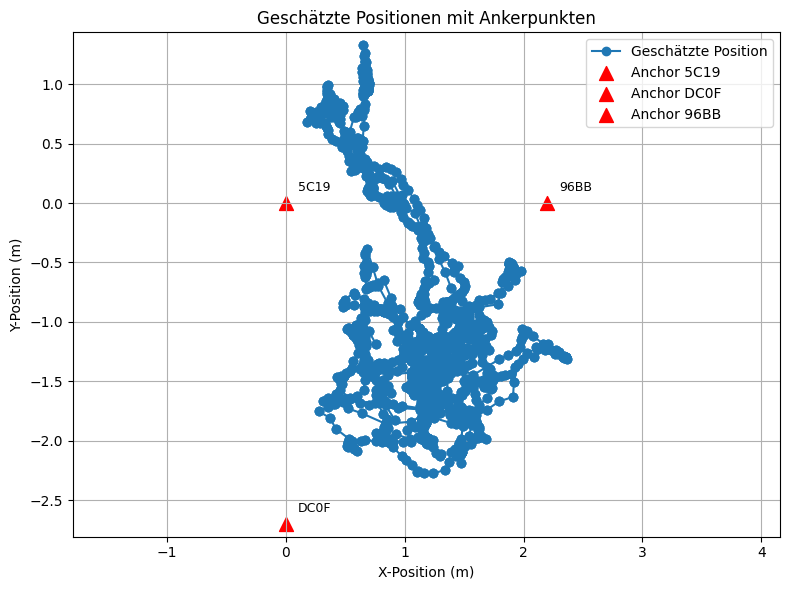

In [5]:
positions = np.array(positions)

plt.figure(figsize=(8, 6))

plt.plot(positions[:, 0], positions[:, 1], marker='o', label='Geschätzte Position')

for anchor_id, pos in anchor_positions.items():
    x, y = pos[:2]  # 2D
    plt.scatter(x, y, color='red', marker='^', s=100, label=f'Anchor {anchor_id}')
    plt.text(x + 0.1, y + 0.1, anchor_id, fontsize=9)

# Plot-Einstellungen
plt.title("Geschätzte Positionen mit Ankerpunkten")
plt.xlabel("X-Position (m)")
plt.ylabel("Y-Position (m)")
plt.grid(True)
plt.legend()
plt.axis('equal') 
plt.tight_layout()
plt.show()
